In [ ]:
# Update matplotlib version

!pip install matplotlib --upgrade

     |████████████████████████████████| 11.2 MB 290 kB/s 
     |████████████████████████████████| 899 kB 13.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# Import dependecies 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import data

data = pd.read_csv('unordered_demographics.csv')

# Identify column of interest and rename it

column = ['What is your average household income (CAD) in 2021?']
relevant_data = data[column].dropna().rename(columns={'What is your average household income (CAD) in 2021?': 'income'})

In [ ]:
# Generate distribution

relevant_data['Number of Respondents'] = relevant_data.groupby(['income'])['income'].transform('count')
relevant_data

,income,Number of Respondents
0,$0 - 50K,3
1,$0 - 50K,3
2,$0 - 50K,3
3,$100 - 150K,18
4,$100 - 150K,18
...,...,...
82,$50 - 100K,20
83,$50 - 100K,20
84,$50 - 100K,20
85,$50 - 100K,20


[Text(0, 0, '3'),
 Text(0, 0, '18'),
 Text(0, 0, '17'),
 Text(0, 0, '15'),
 Text(0, 0, '5'),
 Text(0, 0, '9'),
 Text(0, 0, '20')]

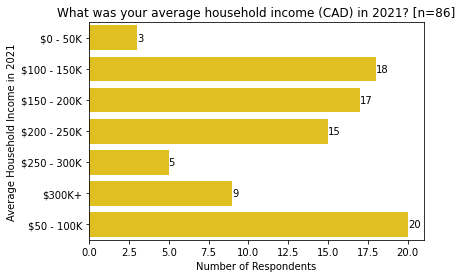

In [ ]:
# Plot graph with appropriate title, color palette, and data

plt.figure()
plt.title("What was your average household income (CAD) in 2021? [n=86]")
ax = sns.barplot(y=relevant_data["income"], x=relevant_data["Number of Respondents"], data=relevant_data, color='#FFD600')
plt.xlabel("Number of Respondents")
plt.ylabel("Average Household Income in 2021")
plt.bar_label(ax.containers[0])